Train Accuracy: 0.987
Train Precision: 0.98
Train Recall: 1.0
Train F1-score: 0.99
Test Accuracy: 0.977
Test Precision: 0.981
Test Recall: 0.981
Test F1-score: 0.981


C:\Users\cfifz\PycharmProjects\pythonProject3\venv\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
C:\Users\cfifz\AppData\Local\Temp\ipykernel_15560\1200558765.py:63: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_train, cmap=plt.cm.get_cmap("Set1", 2))


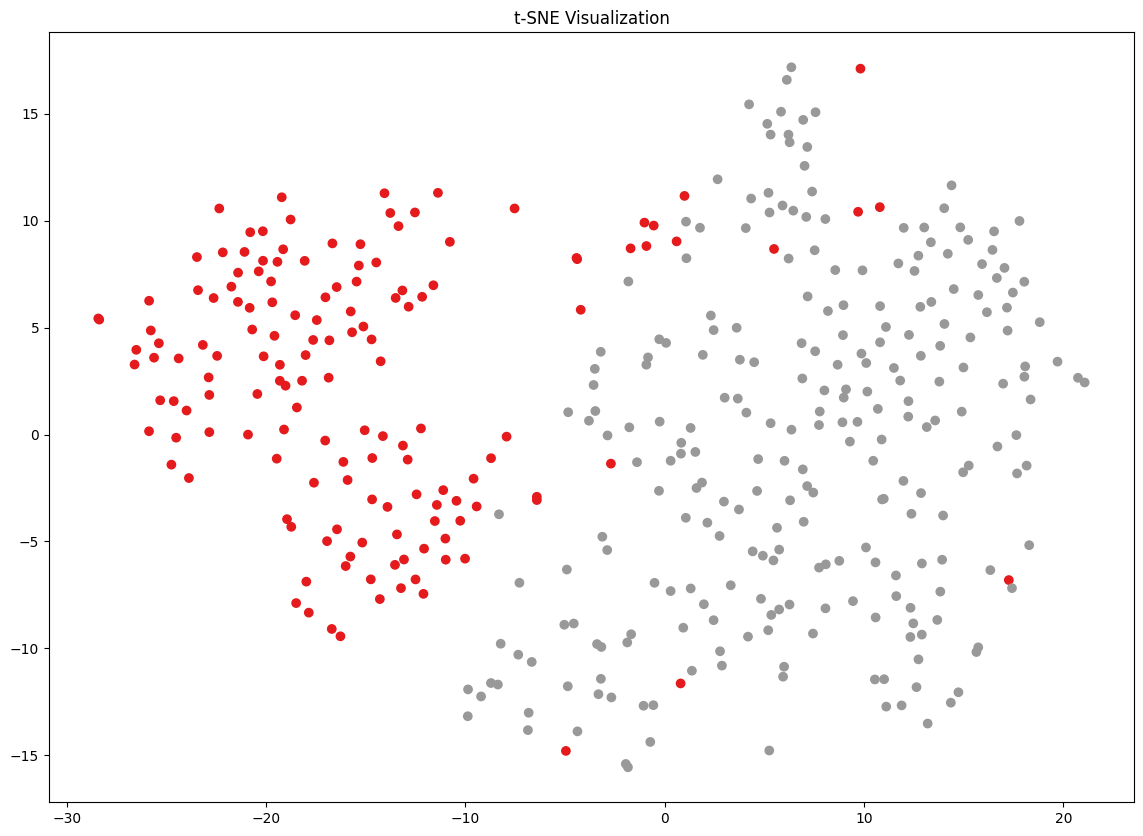

C:\Users\cfifz\AppData\Local\Temp\ipykernel_15560\1200558765.py:70: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.scatter(X_umap[:, 0], X_umap[:, 1], c=y_train, cmap=plt.cm.get_cmap("Set1", 2))


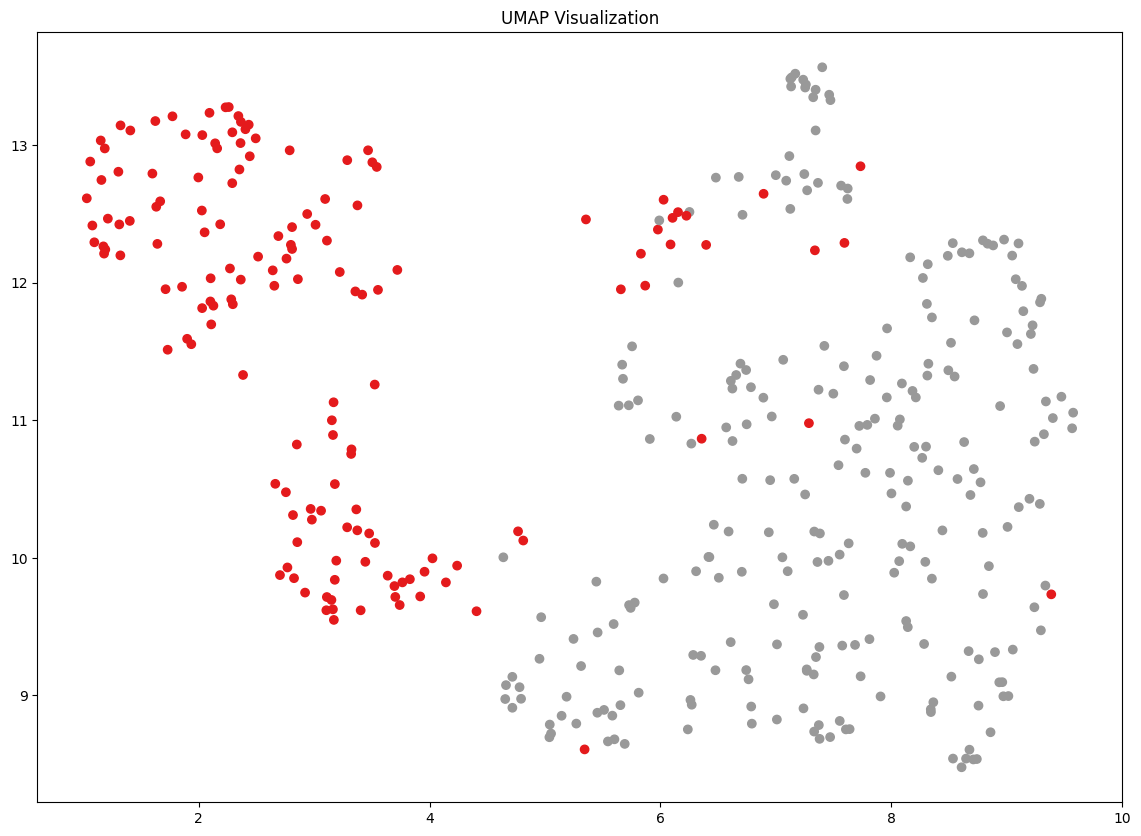

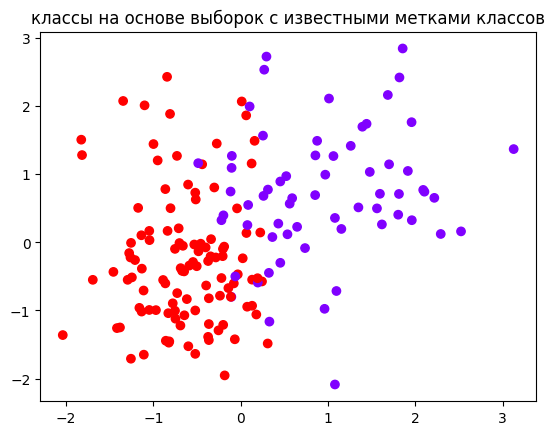

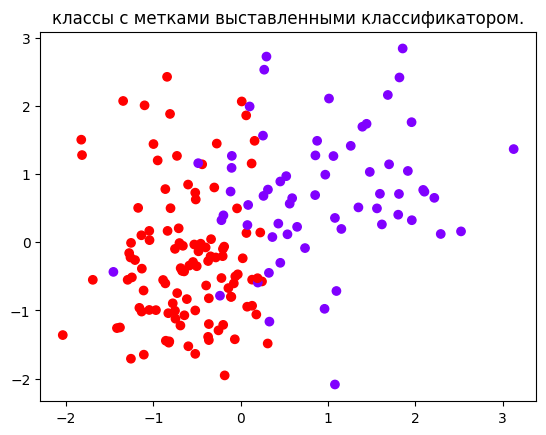

R2: 0.9


In [1]:
import numpy as np
import pandas as pd
import umap.umap_ as umap
from matplotlib import pyplot as plt
from sklearn import metrics
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LinearRegression
from sklearn.manifold import TSNE
from sklearn.metrics import classification_report, accuracy_score, recall_score, precision_score, f1_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

data = load_breast_cancer()
X = data.data
y = data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = SVC()
model.fit(X_train, y_train)



y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

accuracy_train = accuracy_score(y_train, y_train_pred)
accuracy_test = accuracy_score(y_test, y_test_pred)

recall_train = recall_score(y_train, y_train_pred)
recall_test = recall_score(y_test, y_test_pred)

precision_train = precision_score(y_train, y_train_pred)
precision_test = precision_score(y_test, y_test_pred)

f1_train = f1_score(y_train, y_train_pred)
f1_test = f1_score(y_test, y_test_pred)

print('Train Accuracy:', np.round(accuracy_train,3))
print('Train Precision:', np.round(precision_train,3))
print('Train Recall:', np.round(recall_train,3))
print('Train F1-score:', np.round(f1_train,3))

print('Test Accuracy:', np.round(accuracy_test,3))
print('Test Precision:', np.round(precision_test,3))
print('Test Recall:', np.round(recall_test,3))
print('Test F1-score:', np.round(f1_test,3))



tsne = TSNE(n_components=2)
umap_ = umap.UMAP(random_state=42)
X_tsne = tsne.fit_transform(X_train)
X_umap = umap_.fit_transform(X_train)

plt.figure(figsize=(14, 10))

plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_train, cmap=plt.cm.get_cmap("Set1", 2))
plt.title("t-SNE Visualization")
plt.show()


plt.figure(figsize=(14, 10))

plt.scatter(X_umap[:, 0], X_umap[:, 1], c=y_train, cmap=plt.cm.get_cmap("Set1", 2))
plt.title("UMAP Visualization")
plt.show()


plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='rainbow')
plt.title('классы на основе выборок с известными метками классов')
plt.show()

y_pred = model.predict(X_test)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, cmap='rainbow')
plt.title('классы с метками выставленными классификатором.')
plt.show()
print('R2:', np.round(metrics.r2_score(y_test, y_pred), 2))
